In [2]:
import pandas as pd
import numpy as np

percentiles = [0, 25, 50]

data = []
for percentile in percentiles:
    with open(f"./percentile_{percentile}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [percentile]
            split = line.split(", ")
            for eps in split:
                if "None" in eps:
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["percentile", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,percentile,Q1,Q2,Q3,Q4,Q5
0,0,0.002,0.02,0.007,0.009,NaN
1,0,0.010,0.01,0.007,0.005,NaN
2,0,0.002,0.02,0.040,0.030,NaN
3,0,0.020,0.03,0.020,0.030,NaN
4,0,0.030,0.03,0.009,0.020,NaN
5,0,0.008,0.02,0.010,0.010,NaN
6,0,0.010,0.02,0.009,0.006,NaN
7,0,0.010,0.02,0.008,0.010,0.2
8,0,0.004,0.01,0.009,0.090,NaN
9,0,0.006,0.02,0.009,0.020,NaN


In [4]:
df = df.melt(id_vars="percentile", var_name="query", value_name="epsilon")
df

,percentile,query,epsilon
0,0,Q1,0.002
1,0,Q1,0.010
2,0,Q1,0.002
3,0,Q1,0.020
4,0,Q1,0.030
...,...,...,...
145,50,Q5,4.000
146,50,Q5,8.000
147,50,Q5,2.000
148,50,Q5,5.000


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.6)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

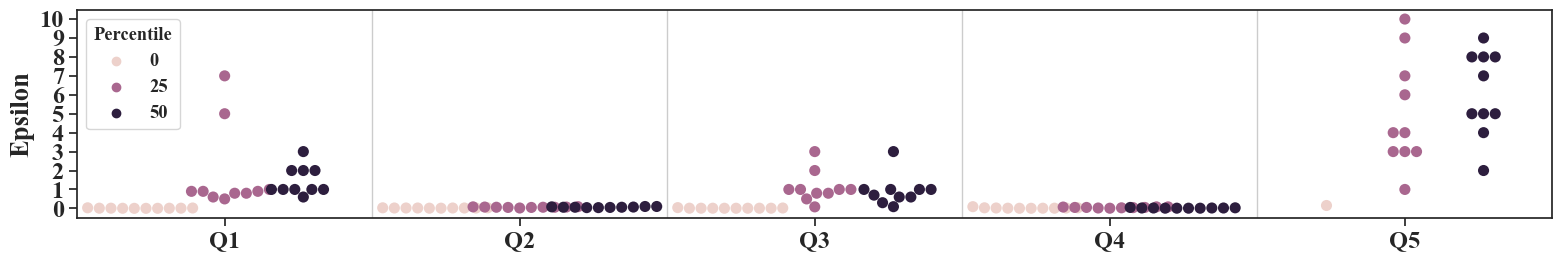

In [29]:
plt.rcParams["figure.figsize"] = [16, 3]

g = sns.swarmplot(data=df, x="query", y="epsilon", hue="percentile", dodge=True, size=8)
_ = g.set(xlabel=None, ylabel="Epsilon")
_ = g.set_yticks([i for i in range(0, 11)])

cords = [0.5, 1.5, 2.5, 3.5, 4.5]
for x in cords:
    plt.axvline(x=x, color="black", alpha=0.2, linewidth=1)

plt.legend(fontsize='x-small', title_fontsize='x-small')
g.legend_.set_title("Percentile")
plt.tight_layout()
plt.savefig("figures/vary_percentile.pdf", bbox_inches = 'tight', pad_inches = 0.05)
plt.show()
plt.close()

In [59]:
import pandas as pd
import numpy as np

percentiles = [5, 25, 50, 75, 95]

data = []
for percentile in percentiles:
    with open(f"./percentile_{percentile}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [percentile]
            split = line.split(", ")
            for eps in split:
                if "None" in eps:
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["percentile", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,percentile,Q1,Q2,Q3,Q4,Q5
0,5,0.07,0.10,0.10,0.06,0.3
1,5,0.09,0.10,0.09,0.10,0.3
2,5,0.09,0.10,0.07,0.07,NaN
3,5,0.10,0.08,0.05,0.07,NaN
4,5,0.10,0.10,0.08,0.06,NaN
...,...,...,...,...,...,...
245,95,2.00,2.00,1.00,1.00,9.0
246,95,4.00,1.00,0.80,5.00,8.0
247,95,0.70,2.00,1.00,1.00,9.0
248,95,0.70,3.00,0.80,2.00,8.0


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.8)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [61]:
df = df.melt(id_vars="percentile", var_name="query", value_name="epsilon")
df

,percentile,query,epsilon
0,5,Q1,0.07
1,5,Q1,0.09
2,5,Q1,0.09
3,5,Q1,0.10
4,5,Q1,0.10
...,...,...,...
1245,95,Q5,9.00
1246,95,Q5,8.00
1247,95,Q5,9.00
1248,95,Q5,8.00


In [62]:
df.loc[df['query'] == "Q1"]

,percentile,query,epsilon
0,5,Q1,0.07
1,5,Q1,0.09
2,5,Q1,0.09
3,5,Q1,0.10
4,5,Q1,0.10
...,...,...,...
245,95,Q1,2.00
246,95,Q1,4.00
247,95,Q1,0.70
248,95,Q1,0.70


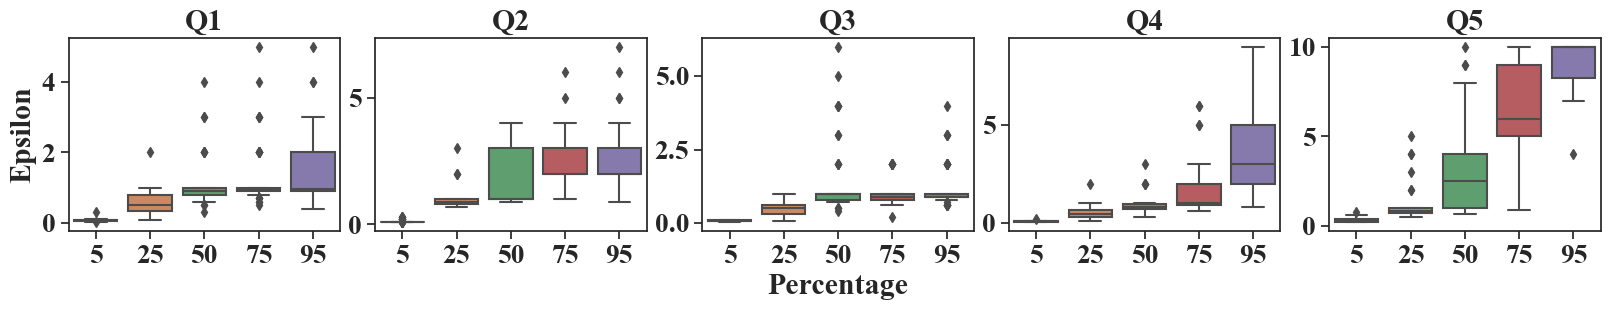

In [63]:
# plt.rcParams["figure.figsize"] = [16, 3]
fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)

for i in range(5):
    data = df[df["query"] == "Q" + str(i+1)]
    g = sns.boxplot(data=data, x="percentile", y="epsilon", ax=axes[i])
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    if i == 2:
        g.set(xlabel="Percentage")
    else:
        g.set(xlabel=None)
    
    axes[i].set_title("Q" + str(i+1), fontweight="bold")
    # g.set(xlabel="Q" + str(i+1))
    # _ = g.set(xlabel=None, ylabel="Epsilon")
    # _ = g.set_yticks([i for i in range(0, 11)])

# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("figures/vary_percentage.pdf", bbox_inches = 'tight')
plt.show()
plt.close()

In [67]:
q5 = df.loc[df['query'] == "Q5"]

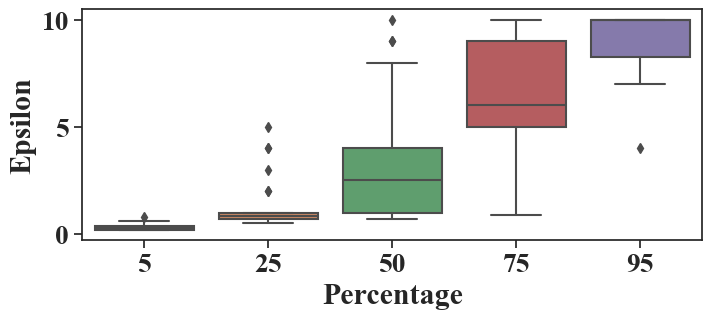

In [76]:
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.8)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams["figure.figsize"] = [8, 3]
# fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)


g = sns.boxplot(data=q5, x="percentile", y="epsilon")

g.set(ylabel="Epsilon")

g.set(xlabel="Percentage")

# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("figures/Q5.pdf", bbox_inches = 'tight')
plt.show()
plt.close()